  Created wheel for memory-profiler: filename=memory_profiler-0.57.0-cp36-none-any.whl size=28992 sha256=8ea63fe99e46d423674656c1356440fc0fc80863391017b447b70f72f9b128d1
  Stored in directory: /root/.cache/pip/wheels/74/20/b5/20964ef97be73d2c3a695c9cad7bccd96d1e3e737a8163861f
Successfully built memory-profiler
TensorFlow 1.x selected.
You have GPU access
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
     |████████████████████████████████| 71kB 5.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-n

1.15.2
Tensorflow enabled.


Using TensorFlow backend.


Depencies installed and imported.
Default advanced parameters enabled
Loaded Input images (number, width, length) = (2000, 488, 1024)
Loaded Output images (number, width, length) = (2000, 488, 1024)
Parameters initiated.
 1999 raw images x    1 transformations   =  1999 images
 1999 images     x   10 patches per image = 19990 patches in total
Input data:
/content/: target='/content/gdrive/My Drive/Care_2D/Max', sources=['/content/gdrive/My Drive/Care_2D/Low'], axes='CYX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
64 x 64


100%|██████████| 1999/1999 [01:45<00:00, 18.99it/s]


Creating 2D training dataset
number of training images:	 17991
number of validation images:	 1999
image size (2D):		 (64, 64)
axes:				 SYXC
channels in / out:		 1 / 1
282
Config(axes='YXC', n_channel_in=1, n_channel_out=1, n_dim=2, probabilistic=False, train_batch_size=64, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_epochs=100, train_learning_rate=0.0004, train_loss='mae', train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0}, train_steps_per_epoch=282, train_tensorboard=True, unet_input_shape=(None, None, 1), unet_kern_size=5, unet_last_activation='linear', unet_n_depth=3, unet_n_first=32, unet_residual=True)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://gith

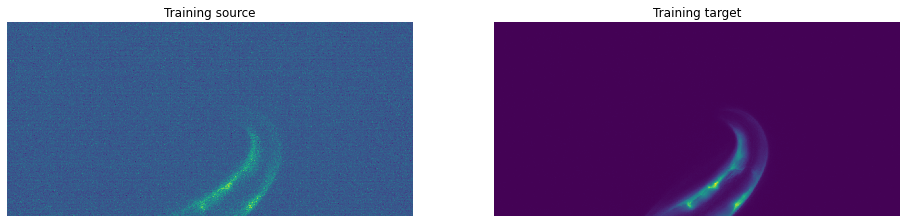

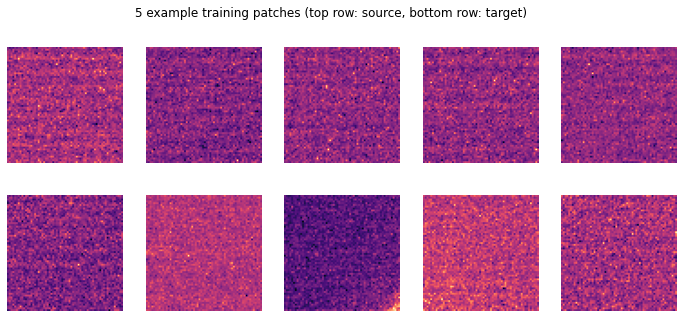

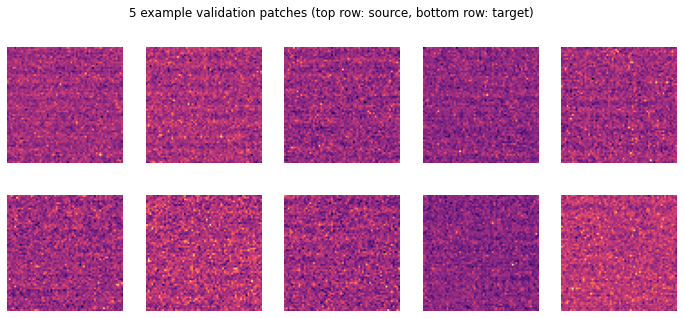

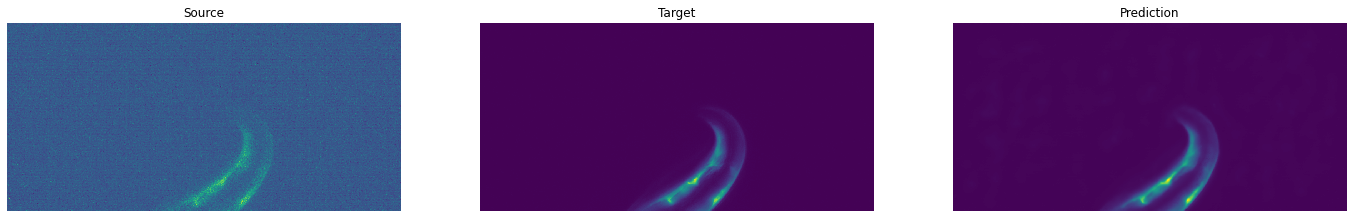

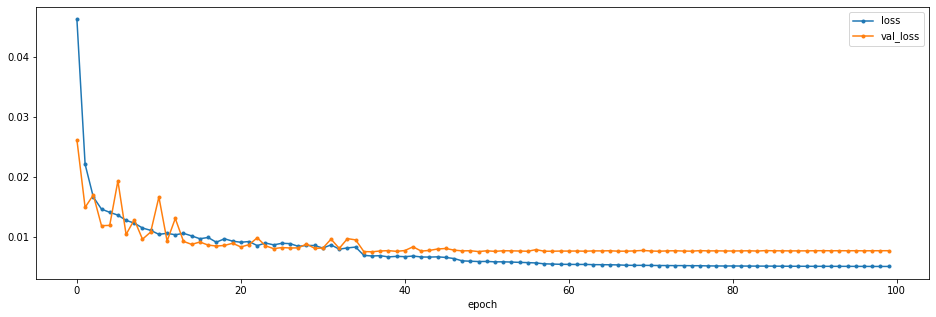

In [1]:
#Install and import dependencies
#Here, we install libraries which are not already included in Colab.
#!pip install tifffile # contains tools to operate tiff-files
#!pip install csbdeep  # contains tools for restoration of fluorescence microcopy images (Content-aware Image Restoration, CARE). It uses Keras and Tensorflow.
#!pip install memory_profiler
!pip install memory_profiler
%load_ext memory_profiler
%tensorflow_version 1.x

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime settings are correct then Google did not allocate GPU to your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')

from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

#@markdown ##Play the cell to train your neural network
#@markdown ###Remember to give your credentials, don't worry I will wait
#@markdown ## ¯ \ _ (ツ) _ / ¯
from __future__ import print_function, unicode_literals, absolute_import, division
from google.colab import drive
drive.mount('/content/gdrive') 
#Select the path to the script
Path_Train_script = "/content/gdrive/My Drive/Colab Notebooks" #@param {type:"string"}
import sys 
import os
sys.path.append(os.path.abspath(Path_Train_script))
import Training_toy

#@markdown ###Path to training images:

# low SNR images
# low = "/content/gdrive/My Drive/Work/manuscript/Ongoing Projects/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/Training datasets/CARE (2D)/Training - Low SNR images" #@param {type:"string"}
Training_source = "/content/gdrive/My Drive/Care_2D/Low" #@param {type:"string"}

# Ground truth images
# GT = "/content/gdrive/My Drive/Work/manuscript/Ongoing Projects/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/Training datasets/CARE (2D)/Training - High SNR images" #@param {type:"string"}
Training_target = "/content/gdrive/My Drive/Care_2D/Max" #@param {type:"string"}

# model name and path
#@markdown ###Name of the model and path to model folder:
model_name = "Model_Automate2000" #@param {type:"string"}
model_path = "/content/gdrive/My Drive/cloud_colab/CARE_WORMS1/models" #@param {type:"string"}

#@markdown ####Use one image of the training set for visual assessment of the training:
Visual_validation_after_training = True #@param {type:"boolean"}


# other parameters for training.
#@markdown ###Training Parameters
#@markdown Number of epochs:

number_of_epochs =  100#@param {type:"number"}

#@markdown Patch size (pixels) and number
patch_size =  64#@param {type:"number"} # in pixels

number_of_patches =   10#@param {type:"number"}


#@markdown ###Advanced Parameters

Use_Default_Advanced_Parameters = True #@param {type:"boolean"}
#@markdown ###If not, please input:

number_of_steps =  300 #@param {type:"number"}
batch_size =  32#@param {type:"number"}
percentage_validation =  15 #@param {type:"number"}


Training_toy.train(Training_source, Training_target,
                model_name,
                model_path,
                Visual_validation_after_training,
                number_of_epochs,
                patch_size,
                number_of_patches,
                Use_Default_Advanced_Parameters,
                number_of_steps,
                batch_size,
                percentage_validation)
